In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = yf.download("NVDA", start = "2024-1-1", end = "2024-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.146572,49.273070,47.573829,49.222094,411254000
2024-01-03,47.547840,48.162564,47.298950,47.463878,320896000
2024-01-04,47.976654,48.478430,47.486870,47.745754,306535000
2024-01-05,49.075165,49.524965,48.284516,48.440449,415039000
2024-01-08,52.229755,52.251749,49.456991,49.489977,642510000


<Axes: xlabel='Date'>

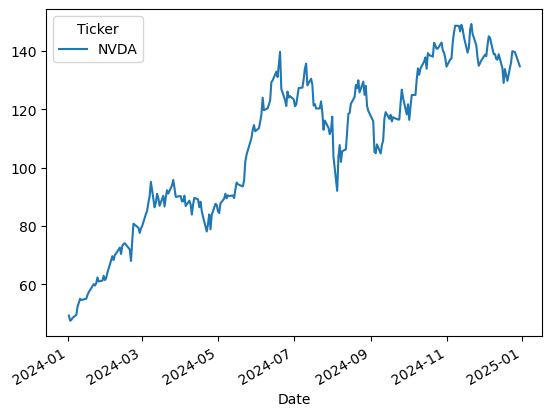

In [4]:
data["Open"].plot()

# **ADF Test**

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    ADF_Statistics = result[0]
    p_value = result[1]
    print(ADF_Statistics)
    print(p_value)
    if p_value < 0.05:
        print("Data is stationary and we accept the null hypothesis and reject the alternative hypothesis")
    else : 
        print("Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis")

In [7]:
adf_test(data["Open"])

-1.9320333606801459
0.3171448590607922
Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis


# **KPSS Test**

In [27]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, regression = "c", nlags = "auto"):
    result = kpss(series)
    KPSS_Statistics = result[0]
    p_value = result[1]
    print(KPSS_Statistics)
    print(p_value)
    if p_value > 0.05:
        print("Data is stationary and we accept the null hypothesis and reject the alternative hypothesis")
    else : 
        print("Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis")

In [29]:
kpss_test(data["Open"])

2.071569276677737
0.01
Data is not stationary and we reject the null hypothesis and accept the altrnative hypothesis


C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_9072\179067070.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series)


# The above data of nvidia is real time data so we can not perform KS test which is used to check strict stationarity of data